#### Loan Prediction

#### Life Cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data Analysis
- Data Pre-Processing
- Model Training
- Choose best model
- Evaluate the Model
- Push the model/deployment of model


### 1) Problem Statement

- Company wants to make automate the Loan Eligibility Process in a real time scenario related to customers detail provided while applying application for home loan forms.

### 2) Data Gathering/Collection

- The data consists of 614 rows and 13 columns.

#### 2.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [3]:
loan_train = pd.read_csv('data/loan-train.csv')

##### Show Top 5 Records

In [4]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_test = pd.read_csv('data/loan-test.csv')

In [6]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


##### Shape of the dataset

In [7]:
loan_train.shape

(614, 13)

#### 2.2 Dataset Information

- Gender : sex of customer -> (Male/Female)
- Married / Unmarried status of Applicant -> (Yes/No)
- Dependent : how many person dependent on the Applicant -> (0,1,2,3,3+)\
- Employment : self-employment/salaried -> (Yes/No)
- Income of Applicant and Co-Applicant : in terms of hundreds
- Loan amount required : in terms of thousands
- Loan Term/Tenure : in terms of months
- Credit History of the Applicant -> (0,1)
- Applicant Property Area : (Urban / Rural/ Semi-Urban)

#### 3. Data Checks to perform

- Check Missing Values
- Check Duplicates
- Check data type
- Check the number of unique values of each columns
- Check statistics of dataset
- Check various categories present in the different categorical columns

#### 3.1 Check Missing Values

In [8]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### There are missing values in following 7 features :
- Gender : 13
- Married : 3
- Dependents : 15
- Self_employed : 32
- Loan Amount : 22
- Loan_Amount_term : 14
- Credit_History : 50

##### Filling Missing Nan Values with mean, mode

In [9]:
# loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)

# loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)

# loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)

# loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)

# loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)

# loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True)

# loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mean(), inplace=True)

# loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

##### 3.2 Check duplicates

In [10]:
loan_train.duplicated().sum()

0

##### There are no duplicates values in the dataset

##### 3.3 Check datatypes

In [11]:
# Check Null and datatypes
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### 3.4 Checking the number of unique values of each columns

In [13]:
loan_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [14]:
loan_train['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

##### 3.5 Check Statistics of dataset

In [15]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###### Insight
- ApplicatIncome feature is having larger values than other features.
- All feature having different mean and standard deviation values.
- There are some missing values in LoanAmount,Loan_Amount_Term and Credit_History

#### 3.7 Exploring Data

In [16]:
print("Categories in 'Gender' variable are:",loan_train['Gender'].unique())
print()
print("Categories in 'Married' variable are:",loan_train['Married'].unique())
print()
print("Categories in 'Dependents' variable are:",loan_train['Dependents'].unique())
print()
print("Categories in 'Education' variable are:",loan_train['Education'].unique())
print()
print("Categories in 'Self_Employed' variable are:",loan_train['Self_Employed'].unique())
print()
print("Categories in 'Property_Area' variable are:",loan_train['Property_Area'].unique())
print()
print("Categories in 'Credit History' variable are:",loan_train['Credit_History'].unique())


Categories in 'Gender' variable are: ['Male' 'Female' nan]

Categories in 'Married' variable are: ['No' 'Yes' nan]

Categories in 'Dependents' variable are: ['0' '1' '2' '3+' nan]

Categories in 'Education' variable are: ['Graduate' 'Not Graduate']

Categories in 'Self_Employed' variable are: ['No' 'Yes' nan]

Categories in 'Property_Area' variable are: ['Urban' 'Rural' 'Semiurban']

Categories in 'Credit History' variable are: [ 1.  0. nan]


In [17]:
# Define numerical & categorical columns

numeric_features = [feature for feature in loan_train.columns if loan_train[feature].dtype != 'O']
categorical_features = [feature for feature in loan_train.columns if loan_train[feature].dtype == 'O']

# Print Columns

print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 5 numerical features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
We have 8 categorical features : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


#### 3.8 Summation of Applicant Income and Co-Applicant Income as Total Income

In [18]:
loan_train['Total_Income'] = loan_train['ApplicantIncome'] + loan_train['CoapplicantIncome']


In [19]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


#### 4. Exploring Data (Visualization)

##### 4.1 Visualize Total_Income distribution to make some conclusion

- Histogram
- Kernal distribution Function(KDE)

##### 4.1.1 Histogram and KDE

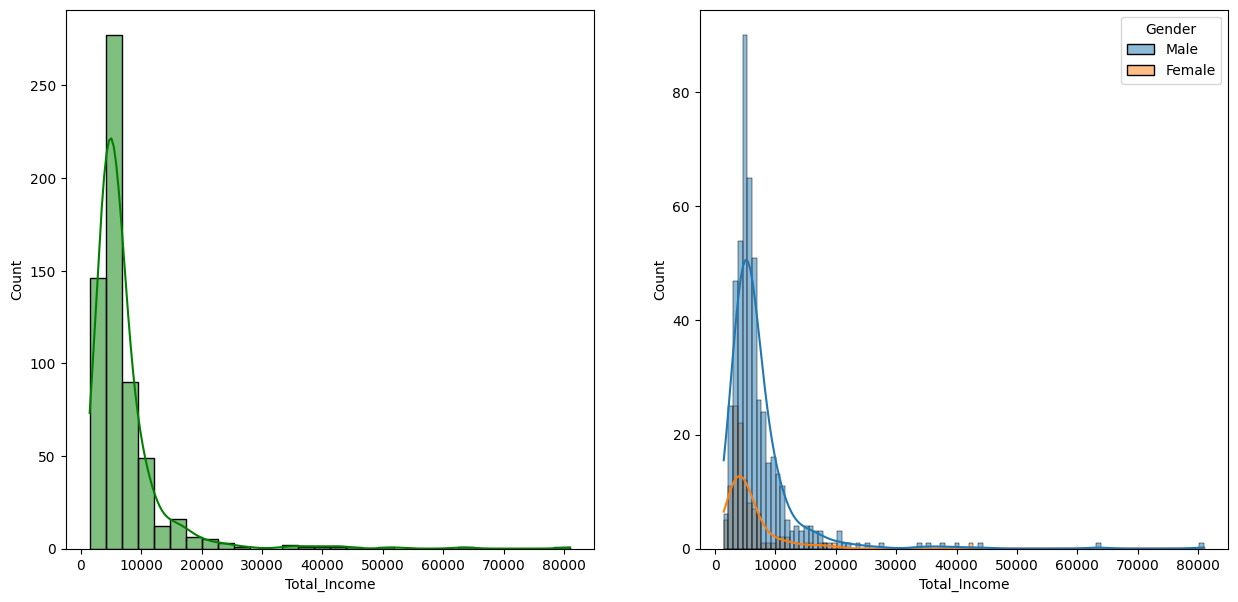

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=loan_train,x = 'Total_Income',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=loan_train,x = 'Total_Income',kde=True,hue='Gender')
plt.show()

##### Insight
- Male Applicants tends to have applying for loan than Female applicants

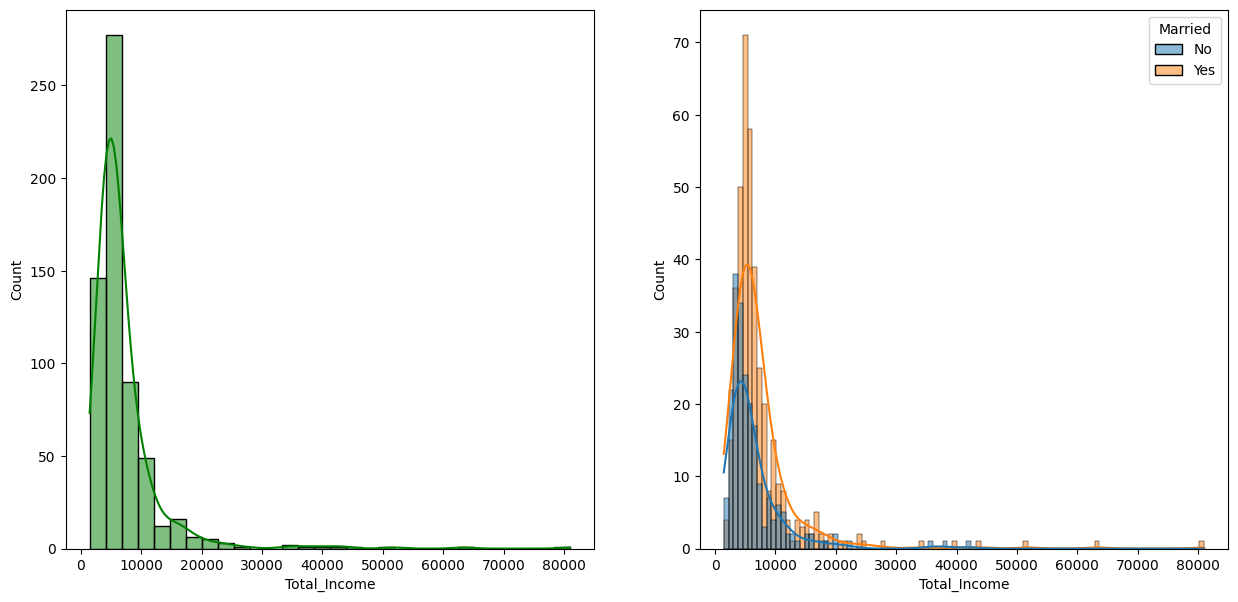

In [21]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=loan_train,x = 'Total_Income',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=loan_train,x = 'Total_Income',kde=True,hue='Married')
plt.show()

##### Insight
- Married Applicant's tends to have applying for loan than unmarrried applicants

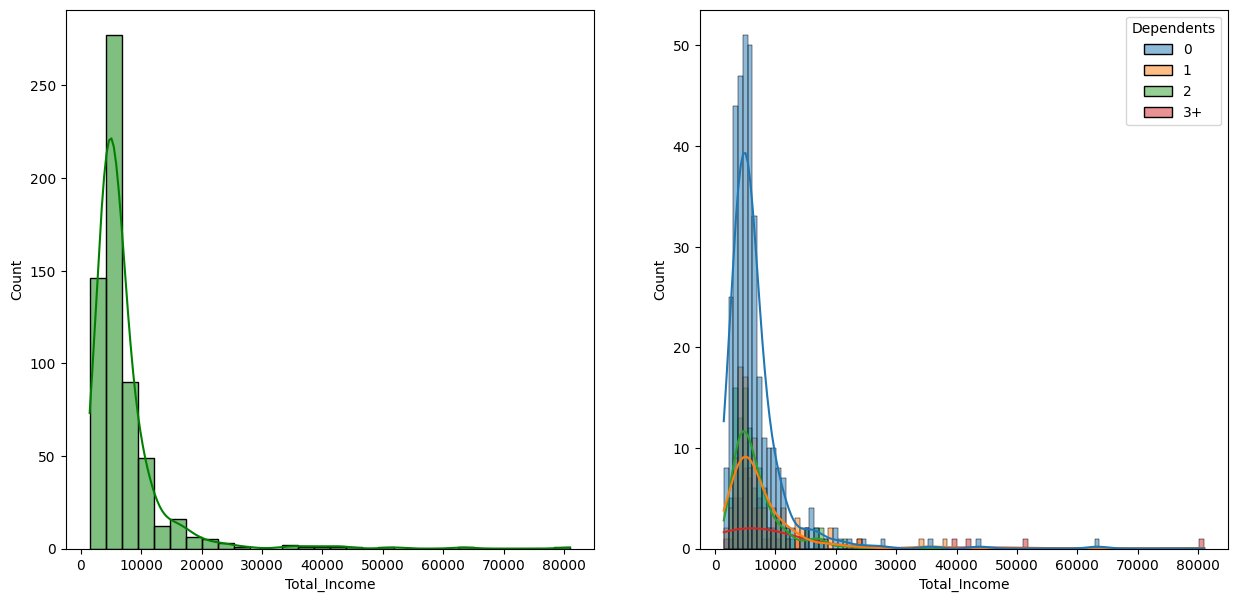

In [22]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=loan_train,x = 'Total_Income',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=loan_train,x = 'Total_Income',kde=True,hue='Dependents')
plt.show()

##### Insight
- Applicant whom zero dependent tends to have applying for loan more than dependent applicants

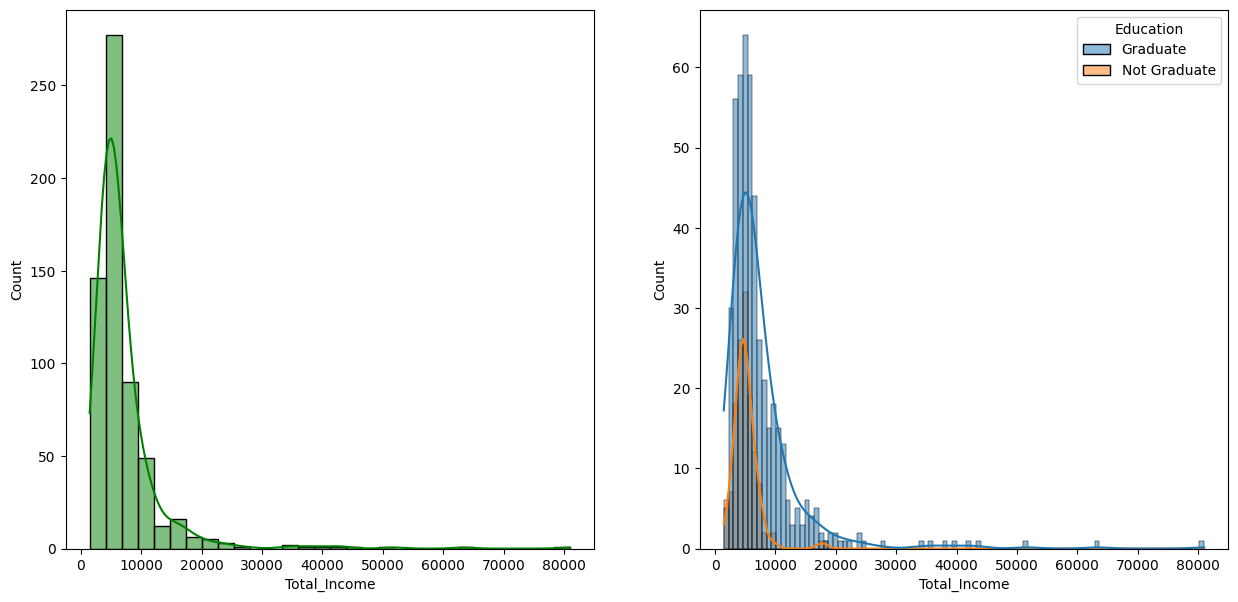

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=loan_train,x = 'Total_Income',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=loan_train,x = 'Total_Income',kde=True,hue='Education')
plt.show()

##### Insight
- Graduate Applicant tends to have applying for loan more than not graduate applicants

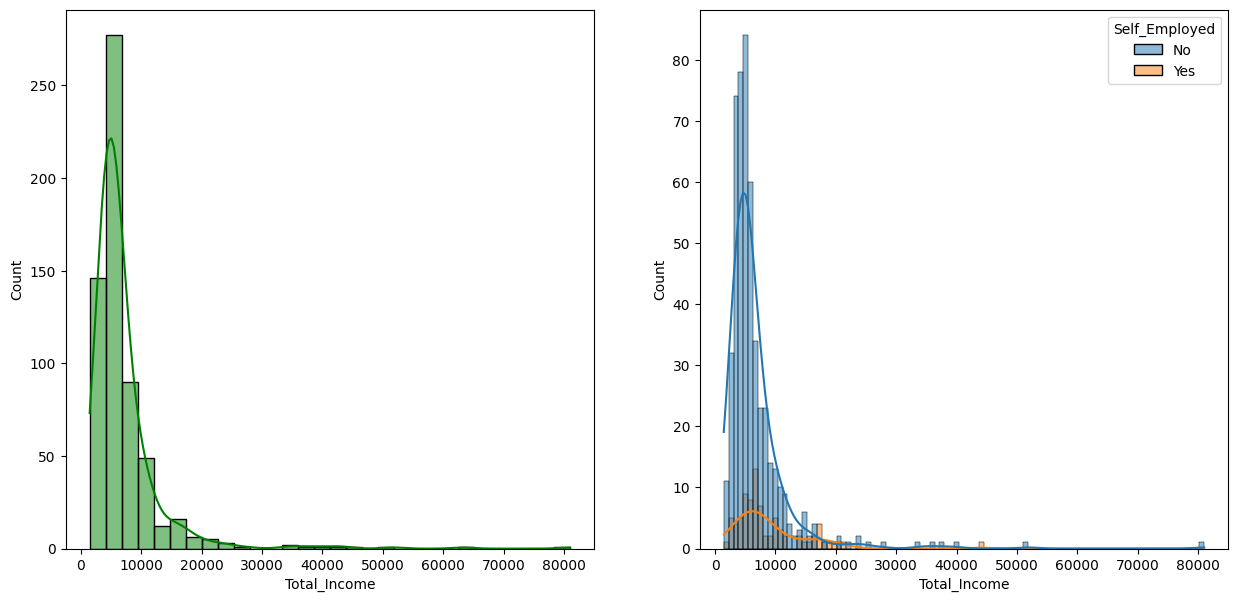

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=loan_train,x = 'Total_Income',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=loan_train,x = 'Total_Income',kde=True,hue='Self_Employed')
plt.show()

##### Insight
- Salaried Applicant's tends to have applying for loan more than Self-Employed applicants

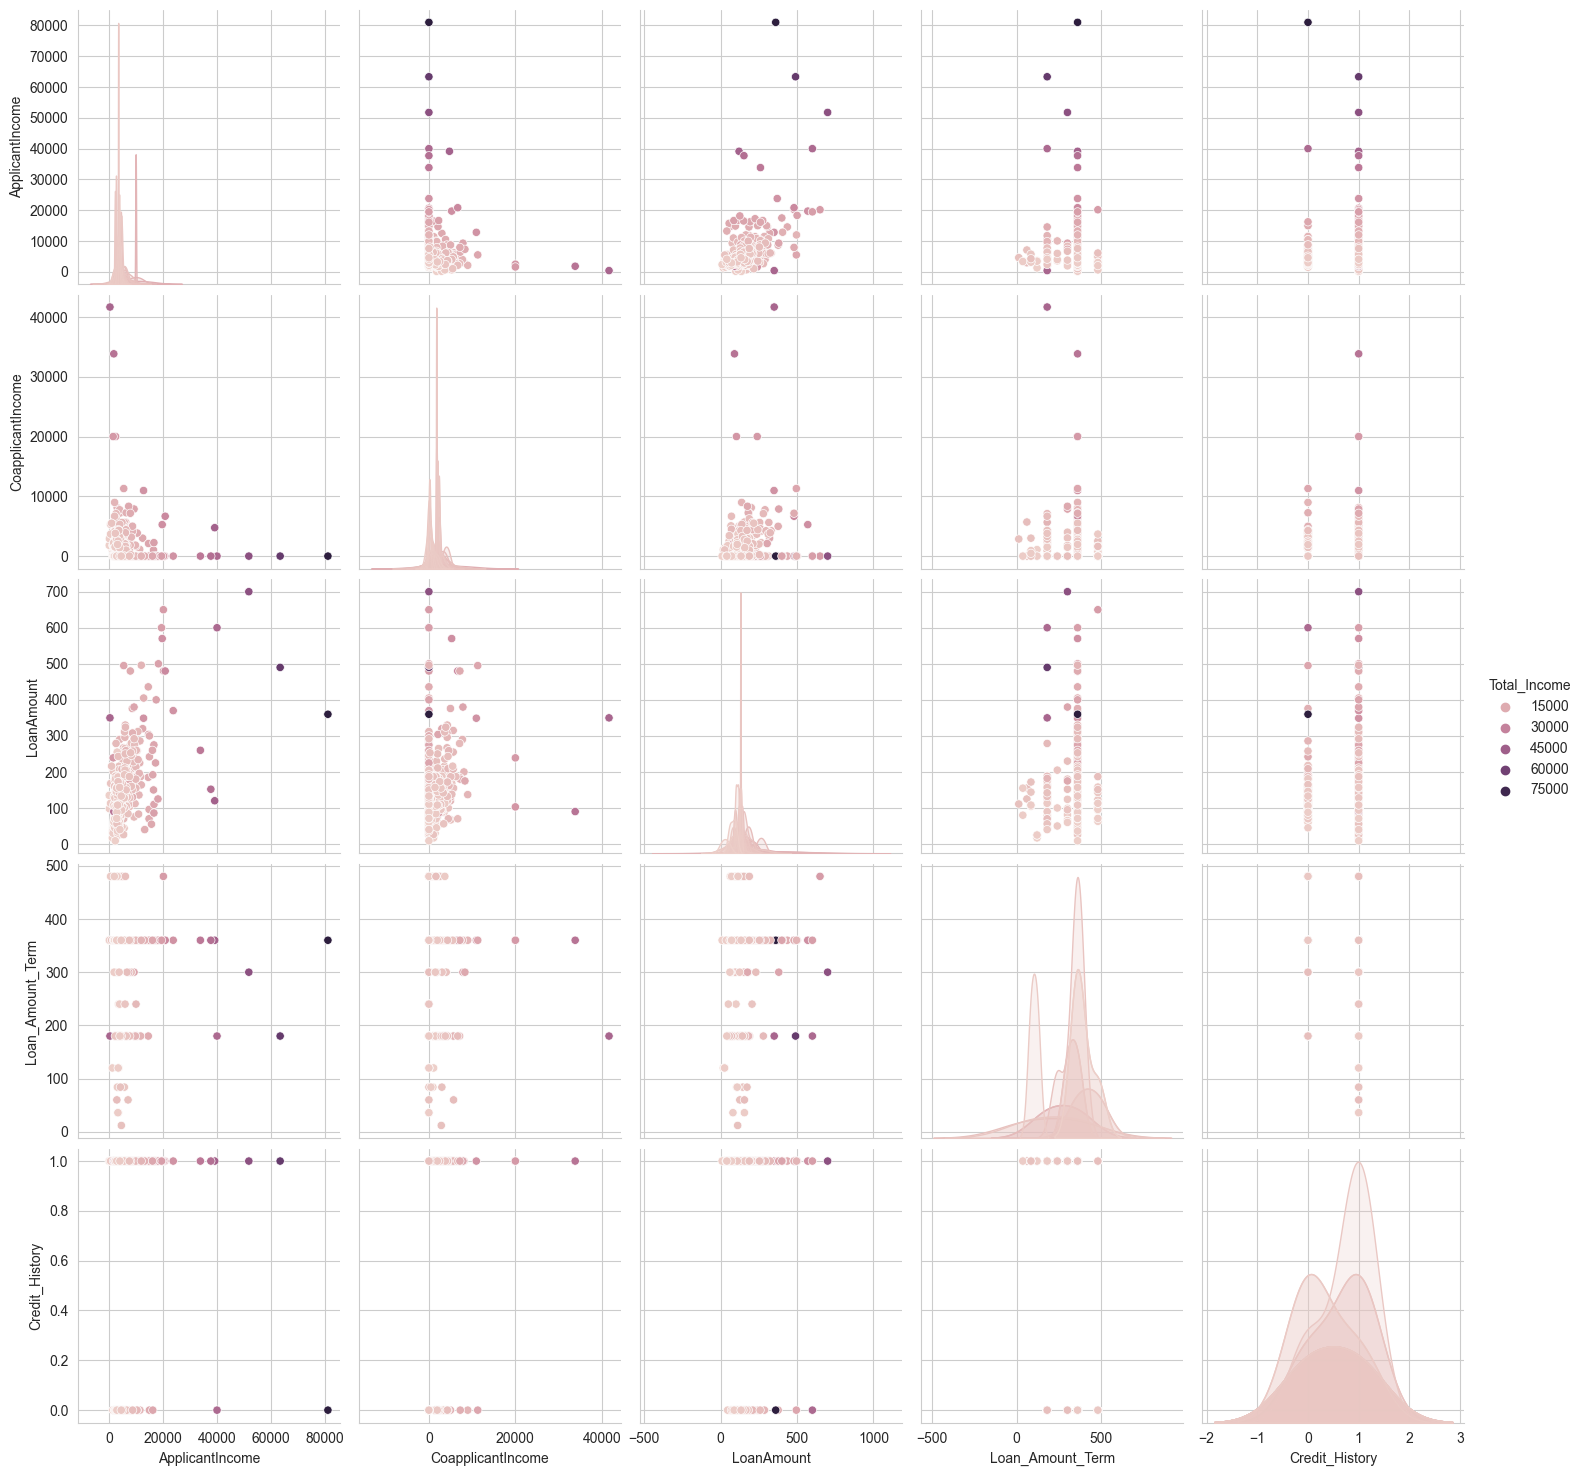

In [25]:
sns.set_style("whitegrid");
sns.pairplot(loan_train, hue="Total_Income", size=3);
plt.show()

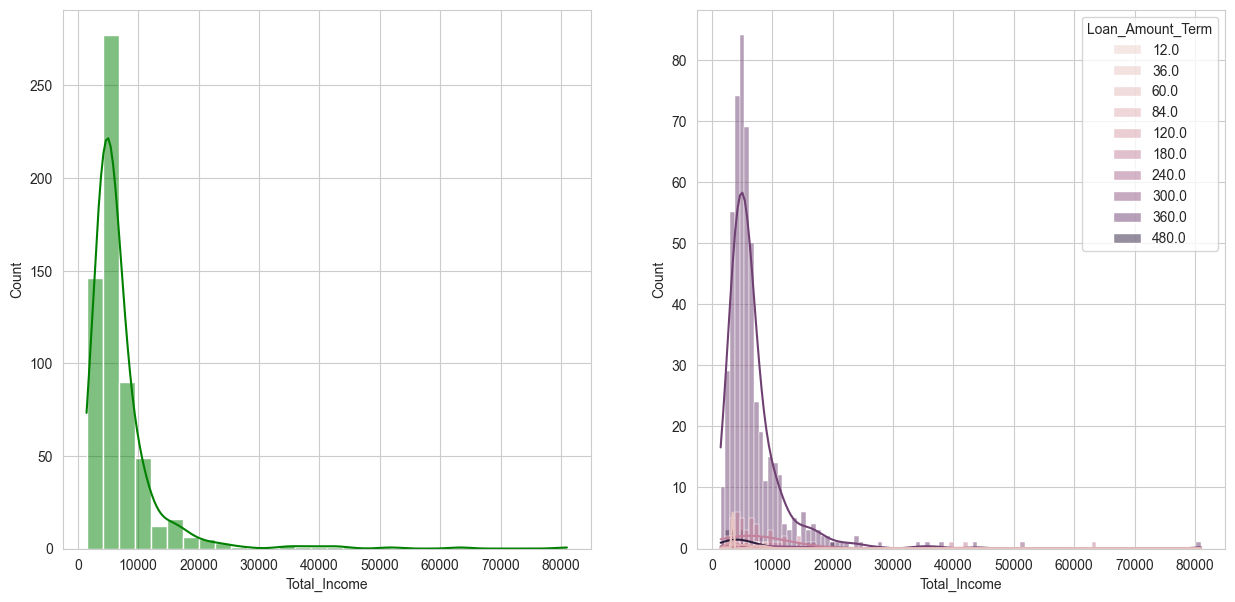

In [26]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=loan_train,x = 'Total_Income',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=loan_train,x = 'Total_Income',kde=True,hue='Loan_Amount_Term',color = 'Any')
plt.show()

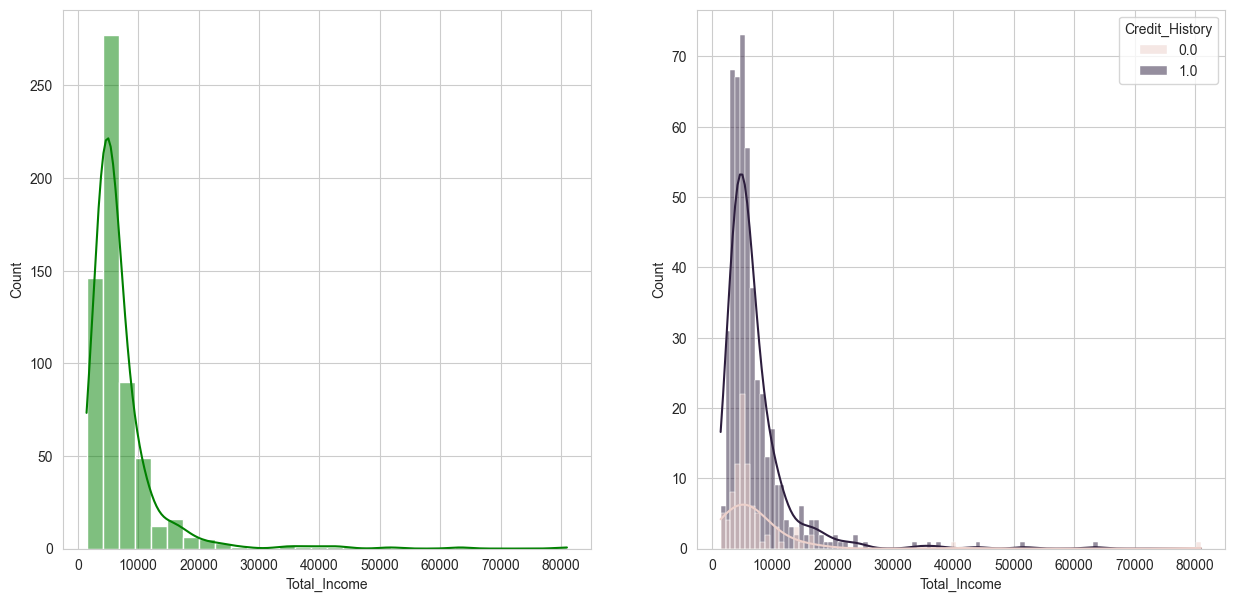

In [27]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=loan_train,x = 'Total_Income',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=loan_train,x = 'Total_Income',kde=True,hue='Credit_History')
plt.show()

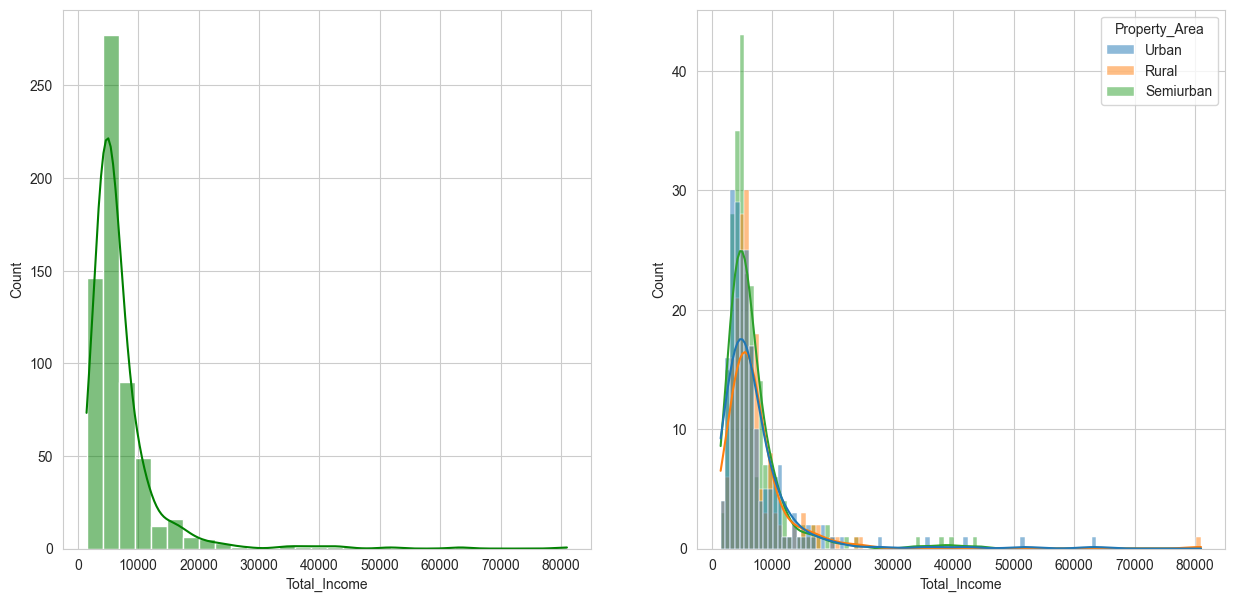

In [28]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=loan_train,x = 'Total_Income',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=loan_train,x = 'Total_Income',kde=True,hue='Property_Area')
plt.show()

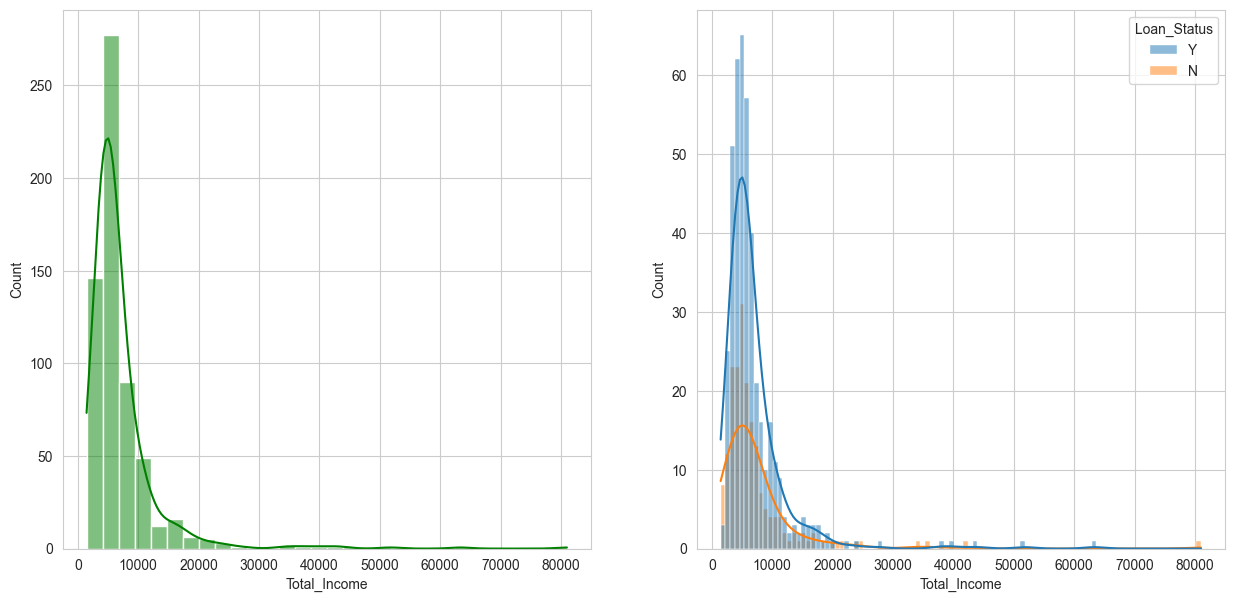

In [29]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=loan_train,x = 'Total_Income',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=loan_train,x = 'Total_Income',kde=True,hue='Loan_Status')
plt.show()

#### Assign a variable for all features

In [30]:
loan_train_columns = loan_train.columns # assign to a variable
loan_train_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

#### Defining a function to know,how many values available in object('categorical') type of features And return categorical values with count.

In [31]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

##### Now, Test and Call a function for gender only

In [32]:

explore_object_type(loan_train, 'Gender')

Gender
Male      489
Female    112
Name: count, dtype: int64


#### Features and their respective counts

In [33]:
for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

"Gender's" Values with count are :
Gender
Male      489
Female    112
Name: count, dtype: int64

"Married's" Values with count are :
Married
Yes    398
No     213
Name: count, dtype: int64

"Dependents's" Values with count are :
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

"Education's" Values with count are :
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

"Self_Employed's" Values with count are :
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

"Property_Area's" Values with count are :
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

"Loan_Status's" Values with count are :
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [35]:
loan_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N,4583.0


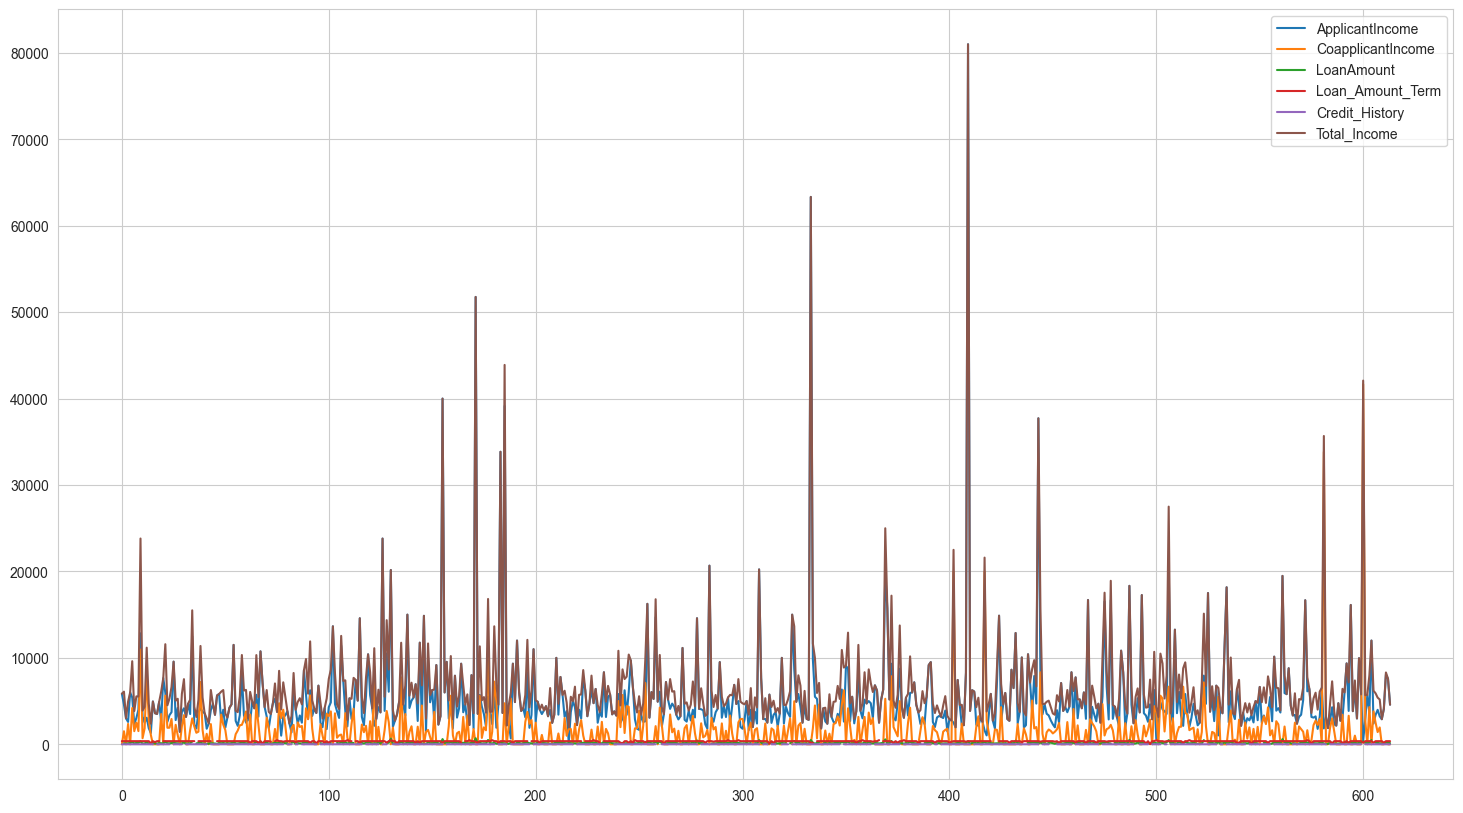

In [36]:
loan_train.plot(figsize=(18, 10))

plt.show()

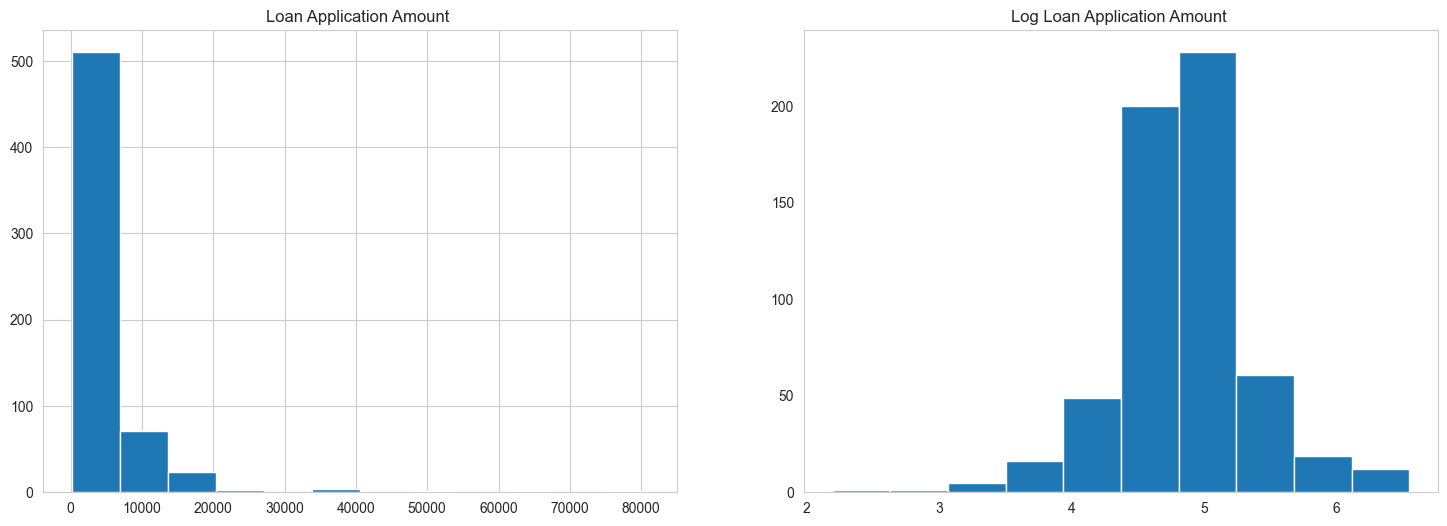

In [37]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=12)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

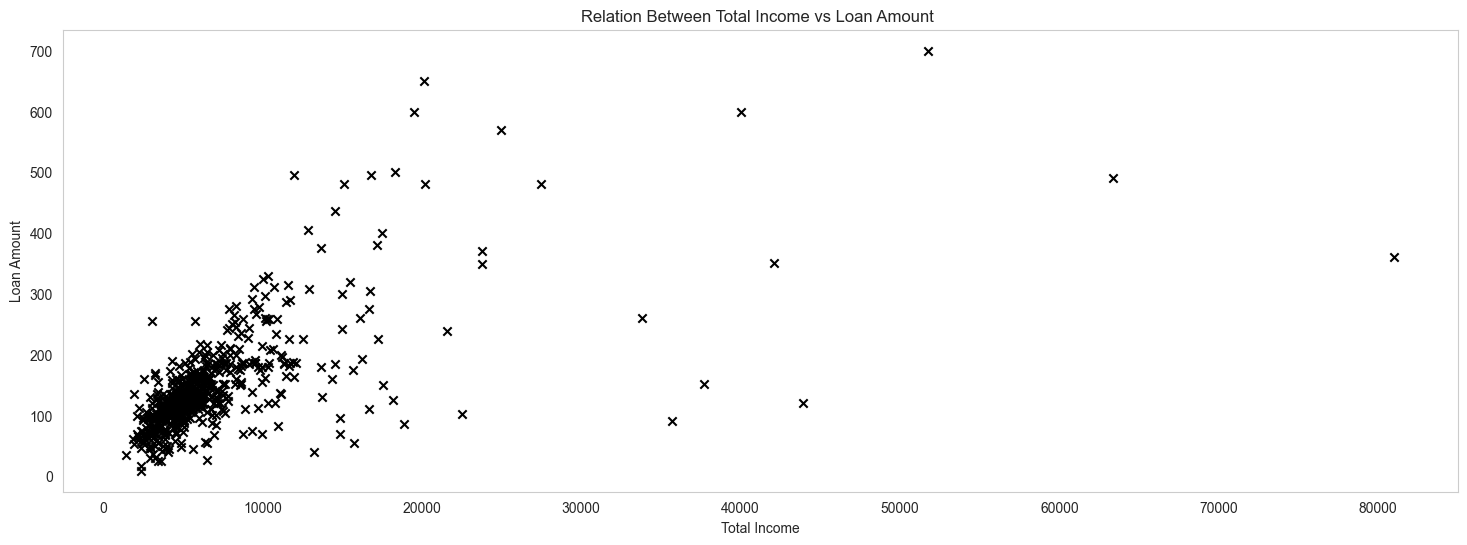

In [38]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Total Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['Total_Income'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Total Income")
plt.ylabel("Loan Amount")
plt.show()

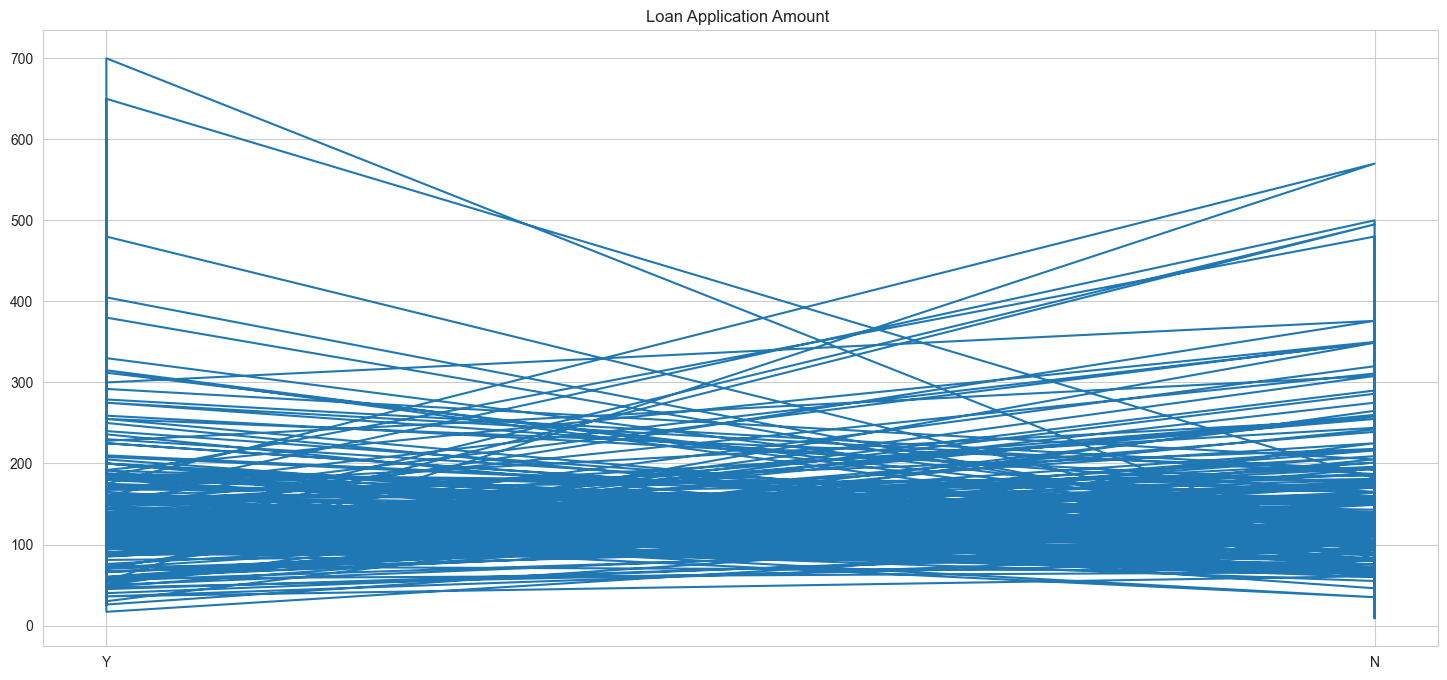

In [39]:
plt.figure(figsize=(18, 8))
plt.plot(loan_train['Loan_Status'], loan_train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

#### Convert Categorical Variable With Numerical Values

In [43]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})

loan_train.Education = loan_train.Education.replace({"Graduate": 1, "Not Graduate" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})

loan_train.Property_Area = loan_train.Property_Area.replace({"Urban": 1, "Rural" : 2, "Semiurban" : 3})

loan_train.Dependents = loan_train.Dependents.replace({"0": 0, "1" : 1, "2" : 2, "3+" : 3})


loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)

In [45]:
loan_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1,5849.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0,6091.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1,3000.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1,4941.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,2,1,2900.0
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,2,1,4106.0
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1,8312.0
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1,7583.0


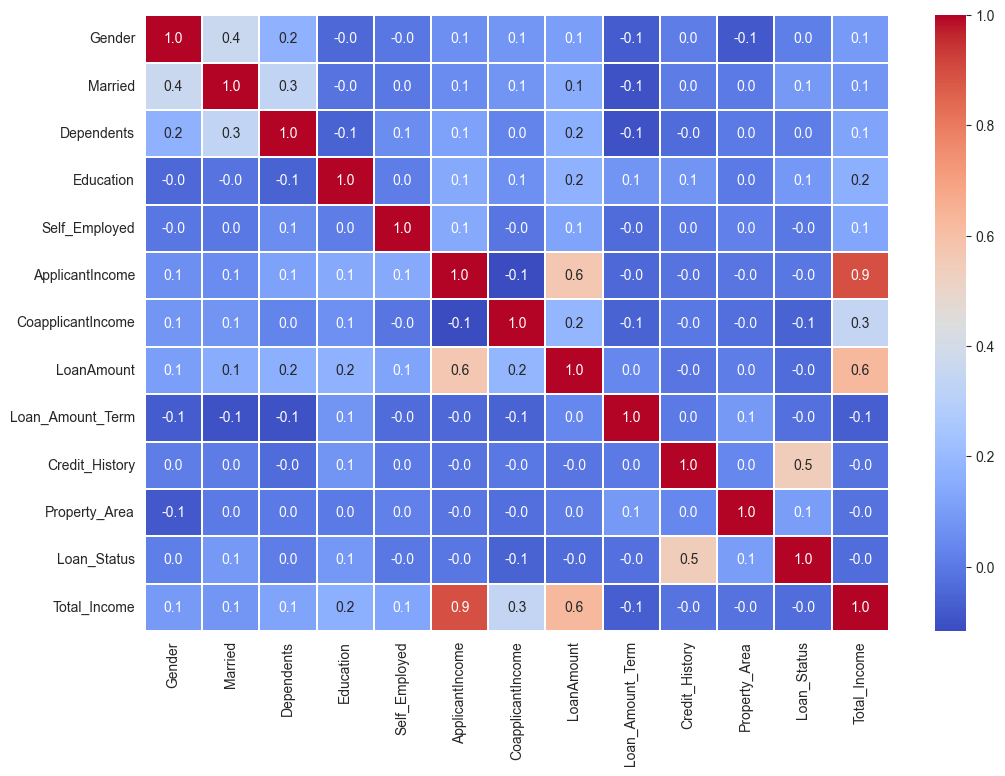

In [46]:
# loan_train.drop(['Loan_ID'],axis=1,inplace=True)

plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [47]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  Total_Income       614 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 62.5 KB


# Modelling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [50]:
# loan_train.drop(['Loan_ID'], axis = 1 , inplace =True)
X = loan_train.drop('Loan_Status' , axis = 1 )
y = loan_train['Loan_Status']
X = np.nan_to_num(X)

In [51]:
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=42)
X_train

array([[1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        4.7870e+03],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        5.6860e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 3.0000e+00,
        4.2690e+03],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        3.2370e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 3.0000e+00,
        1.0047e+04],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.3650e+04]])

## 1. Logistic Regression

In [52]:
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_log = accuracy_score(y_test , pred_l)*100
acc_log

77.83783783783784

## 2. Random Forest

In [53]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

78.37837837837837

##  3.K-Nearest Neighbour

In [54]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

60.0

## 4.Naive Bayes

In [55]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

79.45945945945945

## 5. SVM

In [56]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

64.86486486486487

## 6.Gradient Boosting Classifier

In [57]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

75.67567567567568

In [58]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier'],
    'Score': [acc_log , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Naive Bayes,79.459459
1,Random Forrest,78.378378
0,Logistic Regression,77.837838
5,Gradient Boosting Classifier,75.675676
4,SVM,64.864865
2,K- Nearest Neighbour,60.000000


<Axes: >

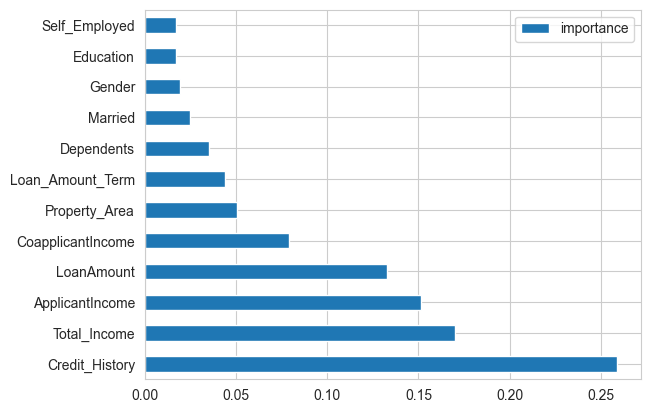

In [59]:
importances = pd.DataFrame(random_forest.feature_importances_,index = loan_train.drop('Loan_Status', axis=1).columns,columns=['importance']).sort_values('importance',ascending=False)
importances.plot.barh()